# Figure 1 --- time series of Mn fluxes across boundaries

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [2]:

import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from dateutil.relativedelta import relativedelta
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
from scipy.signal import find_peaks
import seaborn as sns; sns.set()
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

##### Load domain dimensions for reference:

In [3]:
imin, imax = 1480, 2050
jmin, jmax = 160, 800

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:])

mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12-EXH006_5d_gridT_y2002m01d05.nc')
lons  = np.array(mesh.variables['nav_lon'])
lats  = np.array(mesh.variables['nav_lat'])
tmask = tmask[0,:,imin:imax,jmin:jmax]

In [5]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial4/ref-2003/ANHA12_EXH006_2003_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

##### Load boundary coordinates:

In [6]:
l1i = 2013-imin; l1j = np.arange(300-jmin,392-jmin)
l2i = 1935-imin; l2j = np.arange(450-jmin,530-jmin)
l3i = np.arange(1850-imin,1885-imin); l3j = 555-jmin
l4i = np.arange(1753-imin,1837-imin); l4j = 568-jmin
l5i = np.arange(1720-imin,1790-imin); l5j = 605-jmin
l6i = 1730-imin; l6j = np.arange(660-jmin,690-jmin)

t1i = np.arange(1635-imin,1653-imin); t1j = 760-jmin

r1i = 1520-imin; r1j = np.arange(505-jmin,673-jmin)
r2i = 1520-imin; r2j = np.arange(385-jmin,405-jmin)

N1i = np.arange(1570-imin,1630-imin); N1j = 635-jmin #Nares
P1i = 1585-imin; P1j = np.arange(485-jmin,538-jmin)  #Parry channel

#### Load pickled time series calculations (5d):

In [7]:
def time_series_pickle(year, riv_2a=False, riv_2b=False):
    folder = '/ocean/brogalla/GEOTRACES/time-series/'
    
    # Load calculated time series of fluxes:
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'time-series-20190930-riv-2a'+str(year)+'.pickle','rb'))  
    elif riv_2b:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'time-series-20190930-riv-2b'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
                pickle.load(open(folder+'time-series-20190930-ref'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_mn_WCAA = np.sum(np.sum(time_series_mn3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn6,axis=2),axis=1)
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_mn1, time_series_mn2, time_series_mn_WCAA, time_series_mn7, time_series_mn8, \
            time_series_mn9, time_series_mn10, time_series_mn11

In [8]:
ts_2002_mn1, ts_2002_mn2, ts_2002_mn_WCAA, ts_2002_mn7, ts_2002_mn8, ts_2002_mn9, ts_2002_mn10, ts_2002_mn11 = time_series_pickle(2002)
ts_2003_mn1, ts_2003_mn2, ts_2003_mn_WCAA, ts_2003_mn7, ts_2003_mn8, ts_2003_mn9, ts_2003_mn10, ts_2003_mn11 = time_series_pickle(2003)
ts_2004_mn1, ts_2004_mn2, ts_2004_mn_WCAA, ts_2004_mn7, ts_2004_mn8, ts_2004_mn9, ts_2004_mn10, ts_2004_mn11 = time_series_pickle(2004)
ts_2005_mn1, ts_2005_mn2, ts_2005_mn_WCAA, ts_2005_mn7, ts_2005_mn8, ts_2005_mn9, ts_2005_mn10, ts_2005_mn11 = time_series_pickle(2005)
ts_2006_mn1, ts_2006_mn2, ts_2006_mn_WCAA, ts_2006_mn7, ts_2006_mn8, ts_2006_mn9, ts_2006_mn10, ts_2006_mn11 = time_series_pickle(2006)
ts_2007_mn1, ts_2007_mn2, ts_2007_mn_WCAA, ts_2007_mn7, ts_2007_mn8, ts_2007_mn9, ts_2007_mn10, ts_2007_mn11 = time_series_pickle(2007)
ts_2008_mn1, ts_2008_mn2, ts_2008_mn_WCAA, ts_2008_mn7, ts_2008_mn8, ts_2008_mn9, ts_2008_mn10, ts_2008_mn11 = time_series_pickle(2008)
ts_2009_mn1, ts_2009_mn2, ts_2009_mn_WCAA, ts_2009_mn7, ts_2009_mn8, ts_2009_mn9, ts_2009_mn10, ts_2009_mn11 = time_series_pickle(2009)
ts_2010_mn1, ts_2010_mn2, ts_2010_mn_WCAA, ts_2010_mn7, ts_2010_mn8, ts_2010_mn9, ts_2010_mn10, ts_2010_mn11 = time_series_pickle(2010)
ts_2011_mn1, ts_2011_mn2, ts_2011_mn_WCAA, ts_2011_mn7, ts_2011_mn8, ts_2011_mn9, ts_2011_mn10, ts_2011_mn11 = time_series_pickle(2011)
ts_2012_mn1, ts_2012_mn2, ts_2012_mn_WCAA, ts_2012_mn7, ts_2012_mn8, ts_2012_mn9, ts_2012_mn10, ts_2012_mn11 = time_series_pickle(2012)
ts_2013_mn1, ts_2013_mn2, ts_2013_mn_WCAA, ts_2013_mn7, ts_2013_mn8, ts_2013_mn9, ts_2013_mn10, ts_2013_mn11 = time_series_pickle(2013)
ts_2014_mn1, ts_2014_mn2, ts_2014_mn_WCAA, ts_2014_mn7, ts_2014_mn8, ts_2014_mn9, ts_2014_mn10, ts_2014_mn11 = time_series_pickle(2014)
ts_2015_mn1, ts_2015_mn2, ts_2015_mn_WCAA, ts_2015_mn7, ts_2015_mn8, ts_2015_mn9, ts_2015_mn10, ts_2015_mn11 = time_series_pickle(2015)
ts_2016_mn1, ts_2016_mn2, ts_2016_mn_WCAA, ts_2016_mn7, ts_2016_mn8, ts_2016_mn9, ts_2016_mn10, ts_2016_mn11 = time_series_pickle(2016)
ts_2017_mn1, ts_2017_mn2, ts_2017_mn_WCAA, ts_2017_mn7, ts_2017_mn8, ts_2017_mn9, ts_2017_mn10, ts_2017_mn11 = time_series_pickle(2017)
ts_2018_mn1, ts_2018_mn2, ts_2018_mn_WCAA, ts_2018_mn7, ts_2018_mn8, ts_2018_mn9, ts_2018_mn10, ts_2018_mn11 = time_series_pickle(2018)

### Time series across boundaries:

In [9]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1 = np.sort(os.listdir('/data/brogalla/run_storage/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [10]:
dates_2002 = file_dates(2002); dates_2003 = file_dates(2003); dates_2004 = file_dates(2004);
dates_2005 = file_dates(2005); dates_2006 = file_dates(2006); dates_2007 = file_dates(2007);
dates_2008 = file_dates(2008); dates_2009 = file_dates(2009); dates_2010 = file_dates(2010);
dates_2011 = file_dates(2011); dates_2012 = file_dates(2012); dates_2013 = file_dates(2013);
dates_2014 = file_dates(2014); dates_2015 = file_dates(2015); dates_2016 = file_dates(2016);
dates_2017 = file_dates(2017); dates_2018 = file_dates(2018);

In [11]:
dates = np.array(dates_2002+dates_2003+dates_2004+dates_2005+dates_2006+dates_2007+dates_2008+dates_2009+\
                 dates_2010+dates_2011+dates_2012+dates_2013+dates_2014+dates_2015+dates_2016+dates_2017+dates_2018)

Separated by layer. Boundaries:
- PC1 --- Pout, mn11 --- east end of PC
- PC2 --- Pin, mn2 --- west end of PC
- N1  --- Nout, mn10 -- south end of NS
- N2  --- Nin, mn7 --- north end of NS
- BB  --- mn8 --- BB boundary

In [64]:
def flux_layer(top, bottom):
    in_BB_ref   = np.empty((17, 72))
    out_BB_ref  = np.empty((17, 72))
    in_N1_ref   = np.empty((17, 72))
    out_N1_ref  = np.empty((17, 72))
    in_PC1_ref  = np.empty((17, 72))
    out_PC1_ref = np.empty((17, 72))
    
    in_BB_riv2a   = np.empty((17, 72))
    out_BB_riv2a  = np.empty((17, 72))
    in_N1_riv2a   = np.empty((17, 72))
    out_N1_riv2a  = np.empty((17, 72))
    in_PC1_riv2a  = np.empty((17, 72))
    out_PC1_riv2a = np.empty((17, 72))
    
    in_BB_riv2b   = np.empty((17, 72))
    out_BB_riv2b  = np.empty((17, 72))
    in_N1_riv2b   = np.empty((17, 72))
    out_N1_riv2b  = np.empty((17, 72))
    in_PC1_riv2b  = np.empty((17, 72))
    out_PC1_riv2b = np.empty((17, 72))

    count = 0
    for year in range(2002, 2019):
        ts_year_mn1, ts_year_mn2, ts_year_mn_WCAA, ts_year_mn7, ts_year_mn8, ts_year_mn9, \
        ts_year_mn10, ts_year_mn11 = time_series_pickle(year)
        riv2a_year_mn1, riv2a_year_mn2, riv2a_year_mn_WCAA, riv2a_year_mn7, riv2a_year_mn8, riv2a_year_mn9, \
        riv2a_year_mn10, riv2a_year_mn11 = time_series_pickle(year, riv_2a=True)
        riv2b_year_mn1, riv2b_year_mn2, riv2b_year_mn_WCAA, riv2b_year_mn7, riv2b_year_mn8, riv2b_year_mn9, \
        riv2b_year_mn10, riv2b_year_mn11 = time_series_pickle(year, riv_2b=True)

        for date in range(0,72):
            in_BB_ref[count,date]     = -np.sum(ts_year_mn8[date, top:bottom, :][ts_year_mn8[date, top:bottom, :] >= 0])
            out_BB_ref[count,date]    = -np.sum(ts_year_mn8[date, top:bottom, :][ts_year_mn8[date, top:bottom, :] < 0])
            in_BB_riv2a[count,date]   = -np.sum(riv2a_year_mn8[date, top:bottom, :][riv2a_year_mn8[date, top:bottom, :] >= 0])
            out_BB_riv2a[count,date]  = -np.sum(riv2a_year_mn8[date, top:bottom, :][riv2a_year_mn8[date, top:bottom, :] < 0])
            in_BB_riv2b[count,date]   = -np.sum(riv2b_year_mn8[date, top:bottom, :][riv2b_year_mn8[date, top:bottom, :] >= 0])
            out_BB_riv2b[count,date]  = -np.sum(riv2b_year_mn8[date, top:bottom, :][riv2b_year_mn8[date, top:bottom, :] < 0])
            
            in_N1_ref[count,date]     = -np.sum(ts_year_mn10[date, top:bottom, :][ts_year_mn10[date, top:bottom, :] >= 0])
            out_N1_ref[count,date]    = -np.sum(ts_year_mn10[date, top:bottom, :][ts_year_mn10[date, top:bottom, :] < 0]) 
            in_N1_riv2a[count,date]   = -np.sum(riv2a_year_mn10[date, top:bottom, :][riv2a_year_mn10[date, top:bottom, :] >= 0])
            out_N1_riv2a[count,date]  = -np.sum(riv2a_year_mn10[date, top:bottom, :][riv2a_year_mn10[date, top:bottom, :] < 0]) 
            in_N1_riv2b[count,date]   = -np.sum(riv2b_year_mn10[date, top:bottom, :][riv2a_year_mn10[date, top:bottom, :] >= 0])
            out_N1_riv2b[count,date]  = -np.sum(riv2b_year_mn10[date, top:bottom, :][riv2a_year_mn10[date, top:bottom, :] < 0]) 

            in_PC1_ref[count,date]     = -np.sum(ts_year_mn11[date, top:bottom, :][ts_year_mn11[date, top:bottom, :] >= 0])
            out_PC1_ref[count,date]    = -np.sum(ts_year_mn11[date, top:bottom, :][ts_year_mn11[date, top:bottom, :] < 0]) 
            in_PC1_riv2a[count,date]   = -np.sum(riv2a_year_mn11[date, top:bottom, :][riv2a_year_mn11[date, top:bottom, :] >= 0])
            out_PC1_riv2a[count,date]  = -np.sum(riv2a_year_mn11[date, top:bottom, :][riv2a_year_mn11[date, top:bottom, :] < 0]) 
            in_PC1_riv2b[count,date]   = -np.sum(riv2b_year_mn11[date, top:bottom, :][riv2b_year_mn11[date, top:bottom, :] >= 0])
            out_PC1_riv2b[count,date]  = -np.sum(riv2b_year_mn11[date, top:bottom, :][riv2b_year_mn11[date, top:bottom, :] < 0]) 

        count+=1
        
    return in_BB_ref, out_BB_ref, in_N1_ref, out_N1_ref, in_PC1_ref, out_PC1_ref, \
            in_BB_riv2a, out_BB_riv2a, in_N1_riv2a, out_N1_riv2a, in_PC1_riv2a, out_PC1_riv2a, \
            in_BB_riv2b, out_BB_riv2b, in_N1_riv2b, out_N1_riv2b, in_PC1_riv2b, out_PC1_riv2b

In [65]:
in_BB_ref_total, out_BB_ref_total, in_N1_ref_total, out_N1_ref_total, in_PC1_ref_total, out_PC1_ref_total,\
in_BB_riv2a_total, out_BB_riv2a_total, in_N1_riv2a_total, out_N1_riv2a_total, in_PC1_riv2a_total, \
out_PC1_riv2a_total, in_BB_riv2b_total, out_BB_riv2b_total, in_N1_riv2b_total, out_N1_riv2b_total, \
in_PC1_riv2b_total, out_PC1_riv2b_total = flux_layer(0, 50)

Southward & Eastward --- Positive 

Westward & Northward --- Negative

- PC1 --- Pout, mn11 --- east end of PC
- PC2 --- Pin, mn2 --- west end of PC
- N1  --- Nout, mn10 -- south end of NS
- N2  --- Nin, mn7 --- north end of NS
- BB  --- mn8 --- BB boundary

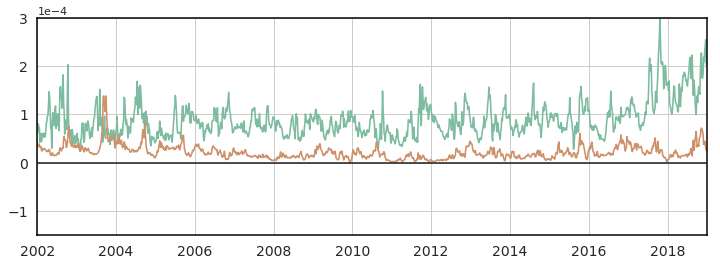

In [96]:
fig = plt.figure(figsize=(12,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates, in_BB_riv2a_total.flatten() + out_BB_riv2a_total.flatten() \
                 - in_BB_ref_total.flatten() - out_BB_ref_total.flatten(), color='#7ebca1', linewidth=1.6)
    sns.lineplot(dates, in_BB_riv2b_total.flatten() + out_BB_riv2b_total.flatten() \
                 - in_BB_ref_total.flatten() - out_BB_ref_total.flatten(), color='#ce9169', linewidth=1.6)

    sns.lineplot([dates_2002[0], dates_2018[-1]], [0, 0], color='k')

    ax.set(ylim=(-1.5e-4, 3e-4), xlim=(dt.datetime(2002,1,1), dt.datetime(2019,1,1)))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     ax.set_ylabel('dMn flux', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');
fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20191030.png', bbox_inches='tight', dpi=300)

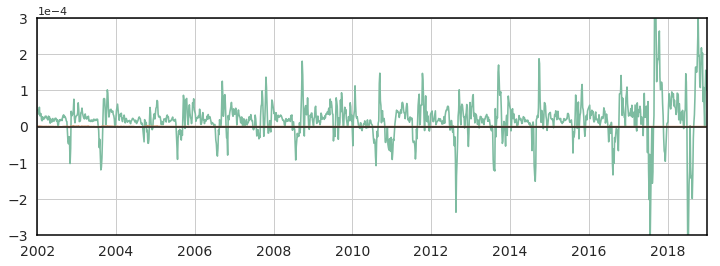

In [97]:
fig = plt.figure(figsize=(12,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates, in_N1_riv2a_total.flatten() + out_N1_riv2a_total.flatten() \
                 - in_N1_ref_total.flatten() - out_N1_ref_total.flatten(), color='#7ebca1', linewidth=1.6)
    sns.lineplot(dates, in_N1_riv2b_total.flatten() + out_N1_riv2b_total.flatten() \
                 - in_N1_ref_total.flatten() - out_N1_ref_total.flatten(), color='#ce9169', linewidth=1.6)
    sns.lineplot([dates_2002[0], dates_2018[-1]], [0, 0], color='k')

    ax.set(ylim=(-3e-4, 3e-4), xlim=(dt.datetime(2002,1,1), dt.datetime(2019,1,1)))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');

fig.savefig('/ocean/brogalla/GEOTRACES/figures/N-time-series-20191030.png', bbox_inches='tight', dpi=300)

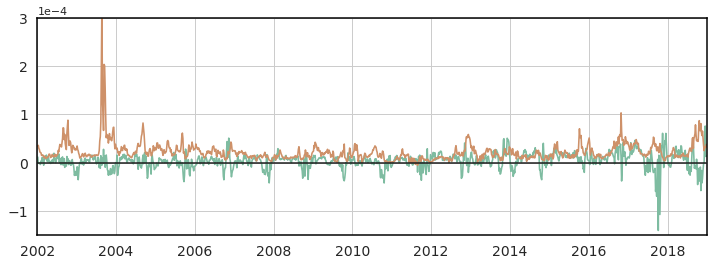

In [98]:
fig = plt.figure(figsize=(12,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates, in_PC1_riv2a_total.flatten() + out_PC1_riv2a_total.flatten() \
                 - in_PC1_ref_total.flatten() - out_PC1_ref_total.flatten(), color='#7ebca1', linewidth=1.6)
    sns.lineplot(dates, in_PC1_riv2b_total.flatten() + out_PC1_riv2b_total.flatten() \
                 - in_PC1_ref_total.flatten() - out_PC1_ref_total.flatten(), color='#ce9169', linewidth=1.6)

    sns.lineplot([dates_2002[0], dates_2018[-1]], [0, 0], color='k')

    ax.set(ylim=(-1.5e-4, 3e-4), xlim=(dt.datetime(2002,1,1), dt.datetime(2019,1,1)))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');

fig.savefig('/ocean/brogalla/GEOTRACES/figures/PC-time-series-20191030.png', bbox_inches='tight', dpi=300)